#**PLN** 

Processamento de linguagem natural (PLN) é uma vertente da inteligência artificial que ajuda computadores a entender, interpretar e manipular a linguagem humana.

O processamento de linguagem natural ajuda computadores a se comunicar com seres humanos em sua própria linguagem e escala outras tarefas relacionadas à linguagem. Por exemplo, o PLN possibilita que computadores leiam textos, ouçam e interpretem falas, identifiquem sentimentos e determinem quais trechos são importantes. 
[Referência: [SAS](https://www.sas.com/pt_br/insights/analytics/processamento-de-linguagem-natural.html)]

Neste projeto irei realizar uma análise de sentimeto de um conjunto de dados que consiste em 3000 frases vindo de reviews das plataformas *imdb.com*, *amazon.com* e *yelp.com*. 

Os dados utilizados nesse projeto podem ser encontrados [nesse site](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences).

Cada frase é rotulada como crítica positiva (rotulada como 1) ou crítica negativa (rotulada como 0).

## **Load and Pre-process the Data**

*   Carregar os dados.
*   Remover os espaços entre as palavras.
*   Separar sentença dos rótulos.
*   Transformar os rótulos.



In [11]:
#import libraries
%matplotlib inline
import string
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# lendo os dados e visualizando as 5 primeiras linhas
with open('sentiment_labelled_sentences/full_set.txt') as f:
  content = f.readlines()
content[0:5]

['So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n',
 'Good case, Excellent value.\t1\n',
 'Great for the jawbone.\t1\n',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\n',
 'The mic is great.\t1\n']

In [14]:
# quantidade de linhas
len(content)

3000

In [15]:
# removendo possíveis espaços em branco (no início e fim de cada frase)
content = [x.strip() for x in content]

In [17]:
# separando as sentenças dos labels(rótulos)
sentences = [x.split("\t")[0] for x in content]
labels = [x.split("\t")[1] for x in content]

print(f'Sentences: {sentences[0:10]}')
print(f'Labels: {labels[0:10]}')

Sentences: ['So there is no way for me to plug it in here in the US unless I go by a converter.', 'Good case, Excellent value.', 'Great for the jawbone.', 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!', 'The mic is great.', 'I have to jiggle the plug to get it to line up right to get decent volume.', 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.', 'If you are Razr owner...you must have this!', 'Needless to say, I wasted my money.', 'What a waste of money and time!.']
Labels: ['0', '1', '1', '0', '1', '0', '0', '1', '0', '0']


In [18]:
# transformando y em (-1,1), onde -1 representa negativo e 1 representa positivo
y = np.array(labels, dtype='int8')
y = np.where(y==0, -1, 1)

y[0:10]

array([-1,  1,  1, -1,  1, -1, -1,  1, -1, -1])

## **Pre-processing the text data**

Agora iremos trabalhar em cima de cada palavra.


*   Remover pontuação e dígitos.
*   Transformar todas as palavras em minúsculas.
*   Remover *stop words*. (ex: the, a, that, this, it, …)
*   Tokenizar os textos.
*   Converter as frases em vetores. 


In [19]:
def full_remove(x, removal_list):
  for w in removal_list:
    x = x.replace(w, ' ')
  return x

In [20]:
# removendo dígitos 
digits = [str(x) for x in range(10)]
remove_digits = [full_remove(x, digits) for x in sentences]

# removendo pontuações
remove_punc = [full_remove(x, list(string.punctuation)) for x in remove_digits]

# colocando em minusculas e tirando possiveis espaços em branco
sents_lower = [x.lower() for x in remove_punc]
sents_lower = [x.strip() for x in sents_lower]

# removendo stop words
from nltk.corpus import stopwords
stops = nltk.corpus.stopwords.words('english')
def removeStopWords(stopWords, txt):
    newtxt = ' '.join([word for word in txt.split() if word not in stopWords])
    return newtxt
sents_processed = [removeStopWords(stops, x) for x in sents_lower]

In [21]:
sents_processed[0:10]

['way plug us unless go converter',
 'good case excellent value',
 'great jawbone',
 'tied charger conversations lasting minutes major problems',
 'mic great',
 'jiggle plug get line right get decent volume',
 'several dozen several hundred contacts imagine fun sending one one',
 'razr owner must',
 'needless say wasted money',
 'waste money time']

Com a remoção das stopwords muitas frases acabam perdendo seu significado, perdendo seu sentido. Para solucionar esse problema vamos criar nossas  próprias stopwords.

In [22]:
stopwords_set = ['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from']
sents_processed = [removeStopWords(stopwords_set, x) for x in sents_lower] 

In [23]:
sents_processed[0:10]

['so there is no way for me plug in here in us unless go by converter',
 'good case excellent value',
 'great for jawbone',
 'tied charger for conversations lasting more than minutes major problems',
 'mic is great',
 'have jiggle plug get line up right get decent volume',
 'if you have several dozen or several hundred contacts then imagine fun sending each them one by one',
 'if you are razr owner you must have this',
 'needless say wasted my money',
 'what waste money and time']

Mais uma tratamento que pode ser acrescentada na nossa etapa de pré processamento é a utilização do Stemmer.

Em Processamento de Linguagem Natural, o processo de reduzir os elementos a um radical comum é chamado de "stemização", ou seja, reduzir uma palavra com determinadas variações a um radical comum. 

In [24]:
def stem_with_porter(words):
  porter = nltk.PorterStemmer()
  new_words = [porter.stem(w) for w in words]
  return new_words

In [25]:
porter = [stem_with_porter(x.split()) for x in sents_processed]
porter = [' '.join(i) for i in porter]

porter[0:10]

['so there is no way for me plug in here in us unless go by convert',
 'good case excel valu',
 'great for jawbon',
 'tie charger for convers last more than minut major problem',
 'mic is great',
 'have jiggl plug get line up right get decent volum',
 'if you have sever dozen or sever hundr contact then imagin fun send each them one by one',
 'if you are razr owner you must have thi',
 'needless say wast my money',
 'what wast money and time']

**Term Document Inverse Document Frequency (TD/IDF).**

O **TD-IDF** é uma medida estatística que tem como intuito indicar a importância de uma palavra em um documento, no contexto de vários documentos. No caso do nosso projeto, várias reviews.

O **TD** é simplesmente uma frequência normalizada da palavra no documento:

`(contagem de palavras no documento) / (total de palavras no documento)`

O **IDF** é uma ponderação da singularidade da palavra em todos os documentos:

`td_idf (t, d) = wc(t, d)/wc(d) / dc(t)/dc()`

— wc(t,d) = ocorrências do termo t no doc d

— wc(d) = palavras no doc d

— dc(t) = documentos que contêm pelo menos 1 ocorrência do termo t

— dc() = documentos em coleção


[Referência: towardsdatascience]


In [30]:
# agora vamos criar um bag of words (conjunto de palavras) e normalizar os textos
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(analyzer = "word", 
                             preprocessor = None, 
                             stop_words =  'english', 
                             max_features = 6000, ngram_range=(1,5))

data_features = vectorizer.fit_transform(sents_processed)
tfidf_transformer = TfidfTransformer()
data_features_tfidf = tfidf_transformer.fit_transform(data_features)

data_mat = data_features_tfidf.toarray()

**TextBlob.**

O **TextBlod** encontra todas as palavras e frases às quais ele pode atribuir polaridade e subjetividade e calcula a média de todas elas juntas. 

Leia mais sobre TextBlob [aqui](https://textblob.readthedocs.io/en/dev/).

*    *Polaridade*: Quão positiva ou negativa é uma palavra. (-1 é muito negativo, +1 é muito positivo.)

*    *Subjetividade*: Quão subjetiva ou opinativa é uma palavra. (0 é fato, +1 é muito uma opinião.)

In [42]:
from textblob import TextBlob
# criando uma função de polaridade e uma função de subjetividade
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

pol_list = [pol(x) for x in sents_processed]
sub_list = [sub(x) for x in sents_processed]

In [43]:
print(pol_list[0:5])
print(sub_list[0:5])

[0.0, 0.85, 0.8, 0.1875, 0.8]
[0.0, 0.8, 0.75, 0.3333333333333333, 0.75]


Com os nossos dados já processados podemos dar ínicio a criação do modelo.

Aqui divido os dados em um conjunto de treinamento de 2500 frases e um conjunto de testes de 500 frases (das quais 250 são positivas e 250 negativas).

## **Criação do Modelo**

*   Logistic Regression
*   Naive Bayes
*   SVM



In [41]:
np.random.seed(0)

test_index = np.append(np.random.choice((np.where(y==-1))[0], 250, replace=False), 
                       np.random.choice((np.where(y==1))[0], 250, replace=False))
train_index = list(set(range(len(labels))) - set(test_index))

train_data = data_mat[train_index]
train_labels = y[train_index]

test_data = data_mat[test_index]
test_labels = y[test_index]

### **1. Logistic Regression**

In [58]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
clf_rl = SGDClassifier(loss='log', penalty='none')
clf_rl.fit(train_data, train_labels)

# extraindo os parâmetros (w, b) do modelo de regressão logística
w = clf_rl.coef_ [0 ,:] 
b = clf_rl.intercept_

# previsões dados de teste
preds_test = clf_rl.predict(test_data)

# acuracia do modelo
accuracy_test_rl = accuracy_score(test_labels, preds_test)
print(accuracy_test_rl)

0.804


## **Criando uma Word Cloud**

In [49]:
# transformando o vocabulário em lista
vocab = np.array([z[0] for z in sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1])])

# obtendo os índices w
inds = np.argsort(w)

# palavras com grandes valores negativos
neg_inds = inds[0:50]
print("Palavras altamente negativas: ")
print([str(x) for x in list(vocab[neg_inds])])

# palavras com grandes valores positivos
pos_inds = inds[-49:-1]
print("Palavras altamente positivas: ")
print([str(x) for x in list(vocab[pos_inds])])

Palavras altamente negativas: 
['bad', 'avoid', 'poor', 'doesn', 'dont', 'worst', 'didn', 'disappointment', 'wasted', 'sucked', 'racial', 'bad food', 'torture', 'disappointing', 'average', 'waited', 'rude', 'slow', 'unsatisfactory', 'soggy', 'terrible', 'ridiculous', 'waste', 'flimsy', 'failed', 'aren', 'unfortunately', 'selection food', 'lame', 'frustration', 'hours', 'lacks', 'awful', 'trash', 'does work', 'guys', 'live', 'horrible', 'useless', 'cheap', 'directing', 'boring', 'says', 'zero', 'appealing', 'stupid', 'joke', 'make', 'piece', 'tinny']
Palavras altamente positivas: 
['fine', 'rate movie', 'quick', 'favorite', 'cult', 'holds', 'solid', 'folks', 'rocks', 'winner', 'keyboard', 'salsa', 'played', 'flavorful', 'hands', 'pleased', 'generous', 'enjoyed', 'incredible', 'won disappointed', 'job', 'best', 'inside', 'long time', 'score', 'cinema', 'performance', 'love headset', 'liked', 'soundtrack', 'fantastic', 'trilogy', 'friendly', 'food good', 'excellent', 'scenery', 'interesti

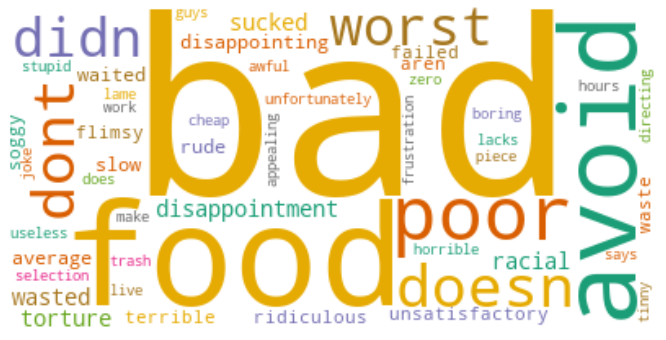

In [52]:
from wordcloud import WordCloud
# wordcloud sentimentos negativos
wc = WordCloud(stopwords=stopwords_set, background_color='white',
               colormap='Dark2', max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [16, 6]

wc.generate(" ".join(list(vocab[neg_inds])))

plt.imshow(wc, interpolation="bilinear")    
plt.axis('off')
plt.show()

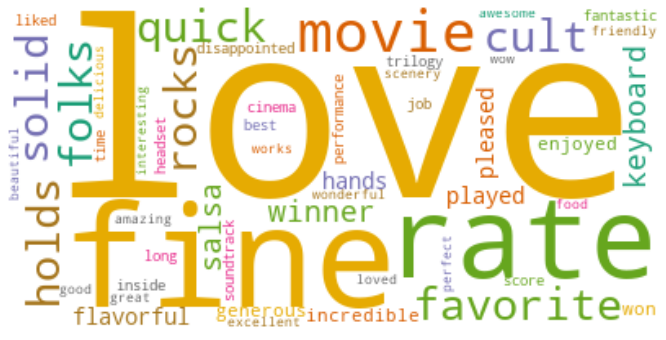

In [53]:
# wordcloud sentimentos positivos
wc = WordCloud(stopwords=stopwords_set, background_color='white',
               colormap='Dark2', max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [16, 6]

wc.generate(" ".join(list(vocab[pos_inds])))

plt.imshow(wc, interpolation="bilinear")    
plt.axis('off')
plt.show()

### **2. Naive Bayes**

In [59]:
from sklearn.naive_bayes import MultinomialNB
clf_nb = MultinomialNB()
clf_nb.fit(train_data, train_labels)

preds_test_nb = clf_nb.predict(test_data)

accuracy_test_nb = accuracy_score(test_labels, preds_test_nb)
print(accuracy_test_nb)

0.826


### **3. SVM**

In [56]:
from sklearn.linear_model import SGDClassifier
clf_svm = SGDClassifier(loss="hinge", penalty='l2')
clf_svm.fit(train_data, train_labels)

preds_test_svm = clf_svm.predict(test_data)

accuracy_test_svm = accuracy_score(test_labels, preds_test_svm)
print(accuracy_test_svm)

0.798


In [60]:
# acuracia
print(f'Logistic Regression: {accuracy_test_rl}')
print(f'Naive Bayes: {accuracy_test_nb}')
print(f'SVM: {accuracy_test_svm}')

Logistic Regression: 0.804
Naive Bayes: 0.826
SVM: 0.798
